In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
# Read diabetes csv file
diabetes_read = pd.read_csv('diabetes_data.csv')

diabetes_read.head()



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Data Exploration and Preprocessing


In [4]:
# Checked for missing values then,
# Determine unique values
for x in diabetes_read.columns:
    print(x, len(diabetes_read[x].unique()))


Age 13
Sex 2
HighChol 2
CholCheck 2
BMI 80
Smoker 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Stroke 2
HighBP 2
Diabetes 2


In [5]:
diabetes_read['Age'].value_counts().sort_index()

Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
Name: count, dtype: int64

# Age categories
- 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 /
- 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older


-To 18-44 (10,737) / 45-59 (20,123) / 60-69 (20,968) / 70+ (18,864)

- 18-44 has a huge age gap compared to others should we split that int another category? 18-31 , 32-44 ???

In [6]:
diabetes_read["Age_Category"] = np.where(diabetes_read['Age']<=5,"18-44",np.where(diabetes_read['Age']<=8,"45-59",np.where(diabetes_read['Age']<=10,"60-69","70+")))
del diabetes_read['Age']
diabetes_read

,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Age_Category
0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0,18-44
1,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,70+
2,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,70+
3,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,70+
4,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,45-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,45-59
70688,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,60-69
70689,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0,70+
70690,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0,70+


In [7]:
dummies_df = pd.get_dummies(diabetes_read, dtype=int)
dummies_df.head()

,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Age_Category_18-44,Age_Category_45-59,Age_Category_60-69,Age_Category_70+
0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,...,5.0,30.0,0.0,0.0,1.0,0.0,1,0,0,0
1,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0,0,0,1
2,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0,0,0,1
3,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,3.0,0.0,0.0,1.0,0.0,0,0,0,1
4,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [8]:
# Split the data
y = dummies_df["Diabetes"]
X = dummies_df.drop("Diabetes", axis=1)

In [9]:
y.value_counts()
# Weird to see an exact # for both positive and negative results

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

In [10]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


**Logistic Regression Model 74% accuracy**

In [ ]:
# Train Model
clf = LogisticRegression(random_state=1,max_iter=1000)
clf.fit(X_train, y_train)
# Make predictions
predictions = clf.predict(X_test)

print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.7498443954054207
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      8913
         1.0       0.74      0.77      0.75      8760

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673

[[6532 2381]
 [2040 6720]]


**Random Forrest 72% accuracy**

In [ ]:
# Random Forrest model adjusted estimators to get 74.4%
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=1)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

print(accuracy_score(y_test,rf_predictions))
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

0.7507497312284276
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      8913
         1.0       0.73      0.80      0.76      8760

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673

[[6300 2613]
 [1792 6968]]


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_clf = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_rf_clf = grid_search.best_estimator_
rf_predictions = best_rf_clf.predict(X_test)

print(accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

**Using Grid Search**
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score:  0.7505611195986345
0.7507497312284276
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      8913
         1.0       0.73      0.80      0.76      8760

     accuracy                           0.75     17673
     macro avg      0.75      0.75      0.75     17673
     weighted avg   0.75      0.75      0.75     17673


[[6300 2613]
 [1792 6968]]

In [ ]:
# Feature importance
importances = rf_clf.feature_importances_
# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

# Shows Age is not important?

NameError: name 'rf_clf' is not defined

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

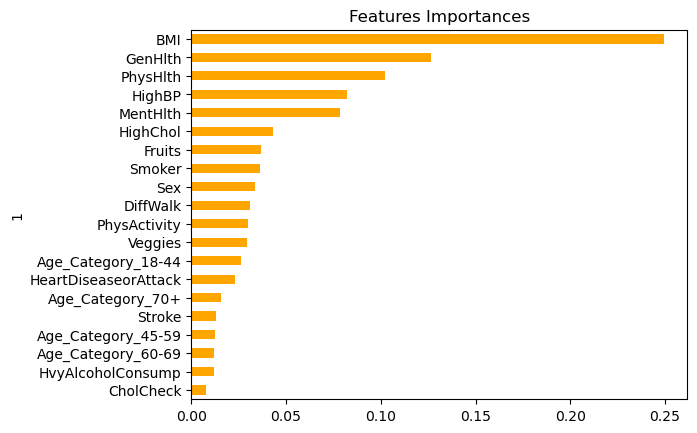

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='orange', title= 'Features Importances', legend=False)

**Model w Selected Columns 'BMI' 'GenHlth' 'PhysHlth' 'HighBP'**

In [ ]:

# 72%
# # Split the original dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Select the desired columns for training and testing
selected_columns = ['BMI', 'GenHlth', 'PhysHlth', 'HighBP']
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Train the model using X_train_selected
clf.fit(X_train_selected, y_train)

# Make predictions using X_test_selected
predictions_selected = clf.predict(X_test_selected)

# Evaluate the model's performance
print(accuracy_score(y_test, predictions_selected))
print(classification_report(y_test, predictions_selected))
print(confusion_matrix(y_test, predictions_selected))


0.7245515758501669
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      8913
         1.0       0.72      0.73      0.72      8760

    accuracy                           0.72     17673
   macro avg       0.72      0.72      0.72     17673
weighted avg       0.72      0.72      0.72     17673

[[6395 2518]
 [2350 6410]]


**Gradient Boosting 73% accuracy**

In [ ]:

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
clf.fit(X_train, y_train)
pred_gb = clf.predict(X_test)
print(accuracy_score(y_test,pred_gb))
print(classification_report(y_test,pred_gb))
print(confusion_matrix(y_test,pred_gb))

0.7350761047926215
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      8913
         1.0       0.72      0.77      0.74      8760

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.73     17673
weighted avg       0.74      0.74      0.73     17673

[[6289 2624]
 [2058 6702]]


In [ ]:
dummies_df.corr()


,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes,Age_Category_18-44,Age_Category_45-59,Age_Category_60-69,Age_Category_70+
Sex,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,...,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413,-0.003859,-0.010266,0.021305,-0.008396
HighChol,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,...,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213,-0.234780,-0.031623,0.119643,0.099219
CholCheck,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,...,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382,-0.088643,-0.025859,0.037038,0.060061
BMI,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,...,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373,-0.033333,0.070395,0.057377,-0.104021
Smoker,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,...,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999,-0.090842,-0.027490,0.043378,0.056962
HeartDiseaseorAttack,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,...,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523,-0.149258,-0.092070,0.038981,0.174790
PhysActivity,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,...,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666,0.082939,0.012542,-0.016420,-0.063139
Fruits,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,...,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077,-0.015192,-0.043300,-0.012526,0.069438
Veggies,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,...,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293,0.026258,-0.004723,-0.008726,-0.007477
HvyAlcoholConsump,0.014164,-0.025443,-0.027146,-0.058232,0.077835,-0.037130,0.019111,-0.033246,0.022090,1.000000,...,0.015626,-0.036257,-0.049294,-0.023395,-0.027030,-0.094853,0.039820,0.019274,-0.007774,-0.043946


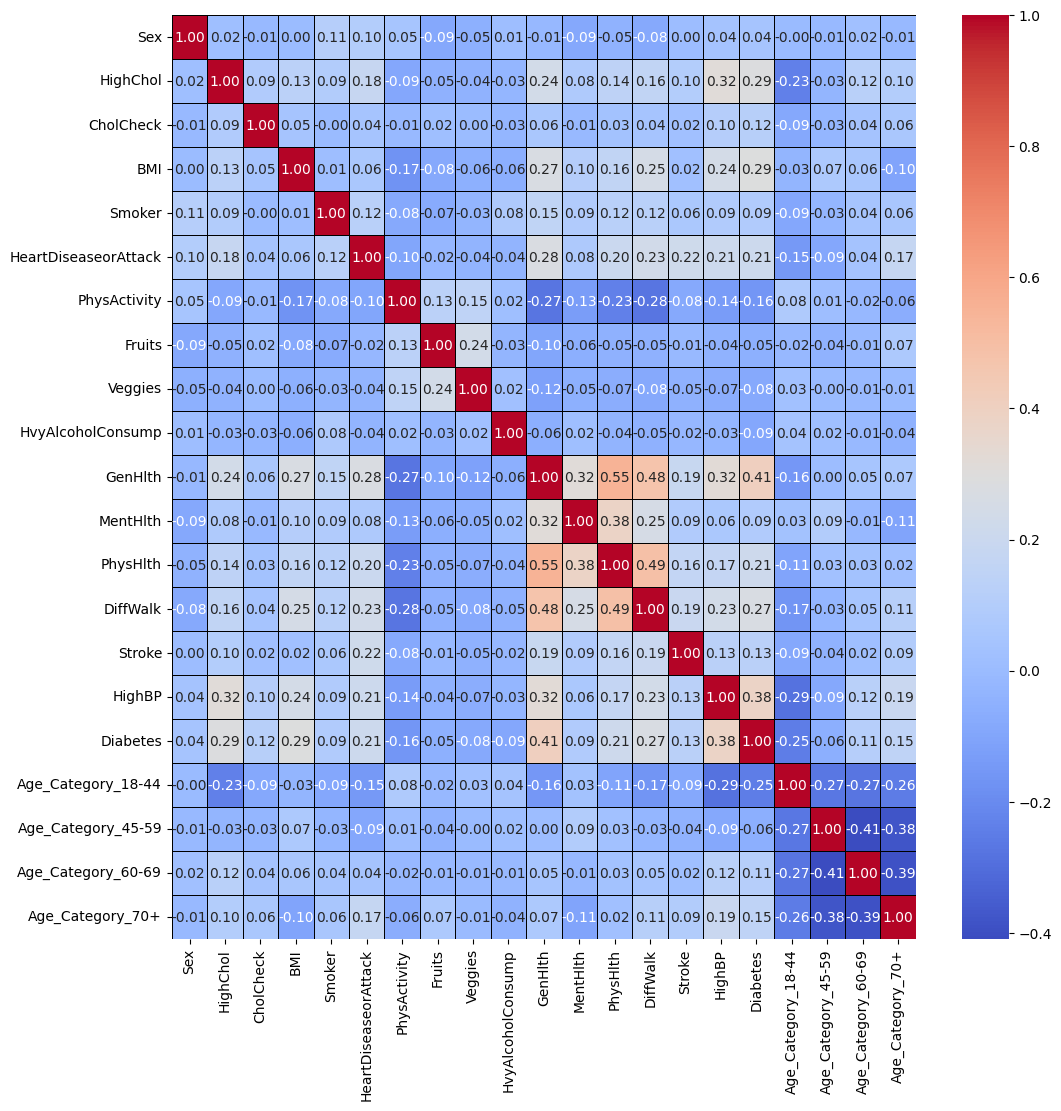

In [ ]:

plt.figure(figsize=(12,12))
dataplot=sb.heatmap(dummies_df.corr(),
                    annot=True,
                    fmt=".2f",
                    cmap="coolwarm",
                    cbar=True,
                    linewidths=0.5,
                    linecolor='black'
                    )

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already loaded your dataset into diabetes_read DataFrame
# and performed train-test split into X_train, X_test, y_train, y_test

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))


Epoch 1/100
  79/1326 [>.............................] - ETA: 5s - loss: 0.6101 - accuracy: 0.6709

KeyboardInterrupt: 

## JENNIFER's TESTING BELOW VVVVVVVVVV

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already loaded your dataset into diabetes_read DataFrame
# and performed train-test split into X_train, X_test, y_train, y_test

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
model = tf.keras.models.Sequential()

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Epoch 1/100
1326/1326 [==============================] - 5s 3ms/step - loss: 0.5638 - accuracy: 0.7020 - val_loss: 0.5172 - val_accuracy: 0.7453
Epoch 2/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5143 - accuracy: 0.7466 - val_loss: 0.5107 - val_accuracy: 0.7481
Epoch 3/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5109 - accuracy: 0.7486 - val_loss: 0.5091 - val_accuracy: 0.7492
Epoch 4/100
1326/1326 [==============================] - 2s 2ms/step - loss: 0.5093 - accuracy: 0.7494 - val_loss: 0.5088 - val_accuracy: 0.7481
Epoch 5/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5081 - accuracy: 0.7505 - val_loss: 0.5079 - val_accuracy: 0.7496
Epoch 6/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5072 - accuracy: 0.7505 - val_loss: 0.5078 - val_accuracy: 0.7488
Epoch 7/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5065 - accuracy: 0.7515 - val_loss: 0.5072 - val_ac

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
input_features = len( X_train_scaled[1])
hidden_nodes_layer1=4
hidden_nodes_layer2=8
hidden_nodes_layer3=16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation='relu'))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
1409/1409 [==============================] - 5s 3ms/step - loss: 0.5910 - accuracy: 0.6971 - val_loss: 0.5309 - val_accuracy: 0.7448
Epoch 2/100
1409/1409 [==============================] - 3s 2ms/step - loss: 0.5215 - accuracy: 0.7452 - val_loss: 0.5148 - val_accuracy: 0.7484
Epoch 3/100
1409/1409 [==============================] - 3s 2ms/step - loss: 0.5136 - accuracy: 0.7467 - val_loss: 0.5105 - val_accuracy: 0.7497
Epoch 4/100
1409/1409 [==============================] - 3s 2ms/step - loss: 0.5115 - accuracy: 0.7479 - val_loss: 0.5083 - val_accuracy: 0.7510
Epoch 5/100
1409/1409 [==============================] - 3s 2ms/step - loss: 0.5106 - accuracy: 0.7488 - val_loss: 0.5086 - val_accuracy: 0.7498
Epoch 6/100
1409/1409 [==============================] - 4s 3ms/step - loss: 0.5099 - accuracy: 0.7482 - val_loss: 0.5078 - val_accuracy: 0.7502
Epoch 7/100
1409/1409 [==============================] - 3s 2ms/step - loss: 0.5094 - accuracy: 0.7487 - val_loss: 0.5074 - val_ac

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Define the input shape
input_features = X_train_scaled.shape[1]

# Model architecture
model = Sequential()
model.add(Dense(128, input_dim=input_features, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/100
1326/1326 [==============================] - 15s 7ms/step - loss: 0.5879 - accuracy: 0.7107 - val_loss: 0.5079 - val_accuracy: 0.7504 - lr: 0.0010
Epoch 2/100
1326/1326 [==============================] - 5s 4ms/step - loss: 0.5302 - accuracy: 0.7399 - val_loss: 0.5077 - val_accuracy: 0.7521 - lr: 0.0010
Epoch 3/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.7433 - val_loss: 0.5058 - val_accuracy: 0.7523 - lr: 0.0010
Epoch 4/100
1326/1326 [==============================] - 3s 2ms/step - loss: 0.5238 - accuracy: 0.7439 - val_loss: 0.5055 - val_accuracy: 0.7505 - lr: 0.0010
Epoch 5/100
1326/1326 [==============================] - 4s 3ms/step - loss: 0.5219 - accuracy: 0.7445 - val_loss: 0.5066 - val_accuracy: 0.7527 - lr: 0.0010
Epoch 6/100
1326/1326 [==============================] - 5s 3ms/step - loss: 0.5209 - accuracy: 0.7451 - val_loss: 0.5048 - val_accuracy: 0.7531 - lr: 0.0010
Epoch 7/100
1326/1326 [============================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.utils import class_weight
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define the input shape
input_features = X_train_scaled.shape[1]

# Model architecture
model = Sequential()
model.add(Dense(256, input_dim=input_features))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    class_weight=class_weights, callbacks=[reduce_lr, early_stopping, lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')




Epoch 1/100
1326/1326 [==============================] - 9s 5ms/step - loss: 0.5655 - accuracy: 0.7180 - val_loss: 0.5099 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 2/100
1326/1326 [==============================] - 5s 4ms/step - loss: 0.5315 - accuracy: 0.7415 - val_loss: 0.5067 - val_accuracy: 0.7512 - lr: 0.0010
Epoch 3/100
1326/1326 [==============================] - 5s 4ms/step - loss: 0.5254 - accuracy: 0.7448 - val_loss: 0.5076 - val_accuracy: 0.7508 - lr: 0.0010
Epoch 4/100
1326/1326 [==============================] - 6s 5ms/step - loss: 0.5263 - accuracy: 0.7458 - val_loss: 0.5063 - val_accuracy: 0.7534 - lr: 0.0010
Epoch 5/100
1326/1326 [==============================] - 5s 4ms/step - loss: 0.5255 - accuracy: 0.7447 - val_loss: 0.5055 - val_accuracy: 0.7511 - lr: 0.0010
Epoch 6/100
1326/1326 [==============================] - 6s 5ms/step - loss: 0.5230 - accuracy: 0.7451 - val_loss: 0.5057 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 7/100
1326/1326 [=============================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.utils import class_weight
import numpy as np


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define the input shape
input_features = X_train_scaled.shape[1]

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=input_features))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(scheduler)

# Ensure y_train is a NumPy array
y_train = np.array(y_train)

# Train the model using k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_accuracies = []

for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()

    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(X_val_fold, y_val_fold),
                        class_weight=class_weights, callbacks=[reduce_lr, early_stopping, lr_scheduler], verbose=0)

    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracies.append(val_accuracy)

print(f'Cross-validated Accuracy: {np.mean(val_accuracies)}')

# Train the final model on the full training set
model = create_model()
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    class_weight=class_weights, callbacks=[reduce_lr, early_stopping, lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Additional evaluation
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


